In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

In [3]:
def get_item(p):  # Function of generation random bits array with lenth 8
    noise = np.random.rand(8) < p
    binary_string = ''.join(str(int(b)) for b in noise)
    result_integer = int(binary_string, 2)
    return result_integer

In [22]:
p = 0.01  # Bit error probability

dataset = np.array([[random.getrandbits(8) for _ in range(3)] for _ in range(int(1e8))])
#noise = np.array([[get_item(p), get_item(p), get_item(p), get_item(p)] for _ in range(1000000)])
#noisy_data = data ^ noise  # XOR multiplication of noise and input message

# Reshape data to fit RNN input shape (samples, timesteps, features)
dataset = dataset.reshape((int(1e8), 3, 1))  # 1000 samples, 3 timesteps, 1 feature
#noisy_data = noisy_data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature

In [26]:
# Build the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='sigmoid', input_shape=(3, 1)))  # RNN layer
model.add(layers.Dense(3))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(dataset, dataset, epochs=1, batch_size=5000)

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 585s 29ms/step - loss: 6666.3330


In [15]:
ber_ber = np.zeros(101)
for i in range(101):
    summ_bit_error = 0
    for j in range(10):
        data = np.array([random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)]).reshape((1, 3, 1))
        noise = np.array([get_item(i/100), get_item(i/100), get_item(i/100)]).reshape((1, 3, 1))
        noisy_data = data ^ noise

        predicted = model.predict(noisy_data).reshape((1, 3, 1)).astype(int)

        errors = predicted ^ data
        summ_bit_error += sum([bin(item[0]).count('1') for item in errors[0]])
    
    ber_ber[i] = summ_bit_error


        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [12]:
x = [i/1000 for i in range(101)]

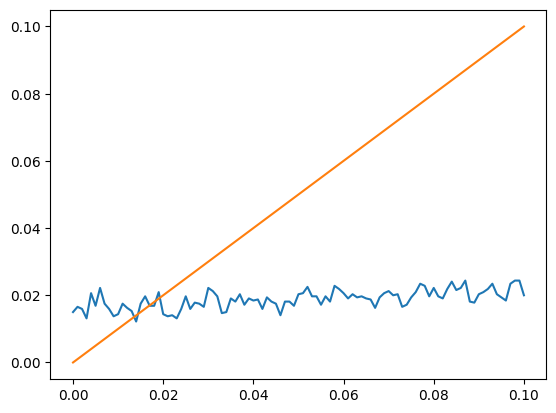

In [14]:
plt.plot(x, ber_ber/(100*32))
plt.plot(x,x)

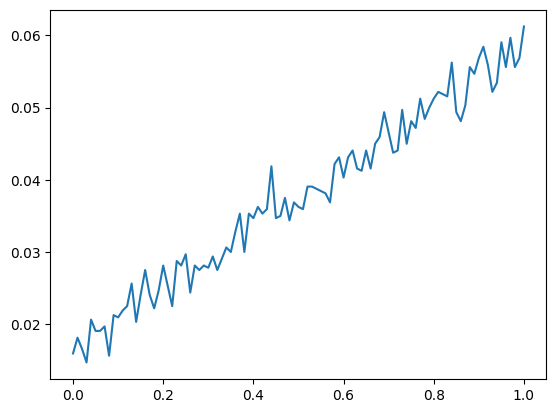

In [17]:
x = [i/100 for i in range(101)]

plt.plot(x, ber_ber/(100*32))

In [20]:
# Build the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='sigmoid', input_shape=(3, 1)))  # RNN layer
model.add(layers.Dense(3))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(data, data, epochs=10, batch_size=1000)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - loss: 22028.2441
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22020.3066
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 22012.3184
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 22004.2754
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21996.1875
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21988.0488
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21979.8672
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21971.6465
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21963.3828
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21955.0879


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

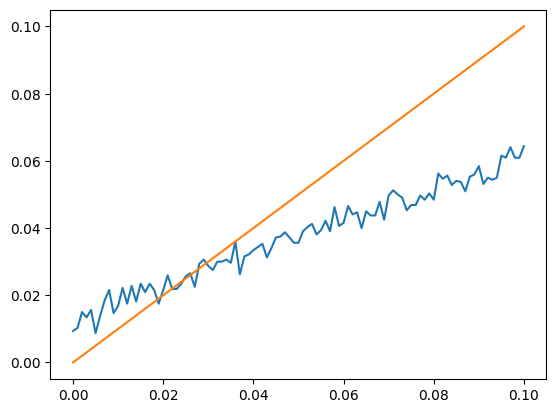

In [27]:
ber_ber = np.zeros(101)
for i in range(101):
    summ_bit_error = 0
    for j in range(10):
        data = np.array([random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)]).reshape((1, 3, 1))
        noise = np.array([get_item(i/100), get_item(i/100), get_item(i/100)]).reshape((1, 3, 1))
        noisy_data = data ^ noise

        predicted = model.predict(noisy_data).reshape((1, 3, 1)).astype(int)

        errors = predicted ^ data
        summ_bit_error += sum([bin(item[0]).count('1') for item in errors[0]])
    
    ber_ber[i] = summ_bit_error

x = [i/1000 for i in range(101)]
plt.plot(x, ber_ber/(100*32))
plt.plot(x,x)